<a href="https://colab.research.google.com/github/Datebi/ProyectoFinalCoderhouse/blob/main/Entrega2_BaigorriaV0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


>>>>> #      Primer entrega del proyecto final 

>> # "Estudio sobre riesgos crediticios en institución bancaria"

>>Profesor: David Romero Acosta 

>>Tutor: Enrique Corimayo

>>Alumno: Esteban Baigorria

>*- Data Science - Coderhouse -*

---



# >Objetivos Generales:

*   Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science.
*   Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos.
*   Construir una presentación ejecutiva para la alta gerencia mostrando los resultados obtenidos.

---



# >Objetivos Específicos:

*   Desarrollar las instancias de Data Acquisition y Data Wrangling en tu trabajo final.

*   Lograr una articulación en equipo y una división de tareas adecuadas a los objetivos.

*   Realizar Filtrado.

*   Describir qué significa cada variable, cómo se comporta.
Especificar las distribuciones y relaciones (géneros, sexo, edad, IVA, tipo de empresa).


---



# >Se debe entregar:

*   Presentación de la empresa, organización o problema específico.

*   Preguntas y objetivos de la investigación.

*   Conformación del equipo de trabajo.

*   Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

*   Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

*   Análisis de componentes principales.

*   Contar la historia de sus datos

*   Filtros aplicados a los datos. Distribución. Dataset final para analizar.

*   Palttear objetivos u objetivo para esos datos.


---




---



---



---



> Una institución bancaria que ofrece creditos al publico se presenta en nuestras oficinas y solicita una evaluacion en base a su base de datos para conocer si es posible clasificar a un cliente como riesgoso o no riesgo en productos bancarios especificos. A continuacion se presenta el click al dataset

>>"Credit Risk Classification Dataset":
>>https://www.kaggle.com/praveengovi/credit-risk-classification-dataset 



> El dataset se compone de las transacciones y datos demograficos. Ademas clasifica en cliente riesgoso y no riesgoso para productos especificos del banco.




>En referencia a los dos archivos csv que componen el dataset:

>>payment_data.csv:

>>>**paymentdata.csv:** Contiene al historial de pago de la tarjeta del cliente

>>>**id:** Numero entero identificador del cliente

>>>**OVDt1:** Cantidad de veces con fecha de pagos vencidos del tipo 1.

>>>**OVDt2:** Cantidad de veces con fecha de pagos vencidos del tipo 2.

>>>**OVDt3:** Cantidad de veces con fecha de pagos vencidos del tipo 3.

>>>**OVDsum:** Cantidad total de de dias que concurrieron con el vencimiento del 
pago vencido.

>>>**paynormal:** Cantidad de dias con fecha de pago normal.

>>>**prodcode:** Codigo de producto de credito

>>>**prodlimit:** Limite de credito del producto.

>>>**updatedate:** Fecha de actualizacion de la cuenta.

>>>**newbalance:** Balance actual del producto.

>>>**highestbalance:** Balance mas alto historico.

>>>**reportdate:** Fecha de pago mas reciente.

>>customer_data.csv:

>>>**customer_data.csv:** Contiene datos demograficos y categoricos sobre los clientes totalmente encriptados para evitar el sesgo, se utilizara la denominacion 'fea' para referirnos a ellas (feature encrypted attribute).

>>>Las variables categoricas son los campos: **fea1, fea3, fea5, fea6, fea7, fea9. Las demograficas: fea2, fea10 y fea11**.

>>>**Label:** 1 si el cliente es de alto riesgo crediticio, 0 si corresponde a un cliente de bajo riesgo.



>*Fuente del Dataset: Google Search*

>*Criterio de selección: Download*



---



---



---



El objetivo del proyecta será poder contestar:

    1.Cuales son los factores contribuyendo a un cliente con alto riesgo crediticio?
    2.Cuales son los atributos de un cliente de bajo riesgo?
    3.Con cuanta precision el modelo podra predecir si un cliente sera de riesgo alto o bajo. 




---



---



---





In [ ]:
## La primera parte del proyecto correspondera a la importación de los sets de datos, data cleaning, al data wrangling y al EDA.
## Se procedera con la siguiente estructura de carpetas

## Directorio_de_trabajo
## |
## |
## |----> Data
## |
## |
## |----> Entrenamiento
## |
## |
## |----> Test
## |
## |
## |----> Validación
## |
## |
## |----> Visuales 

In [ ]:
## Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import shutil
import os
import zipfile
from matplotlib.ticker import FormatStrFormatter


>Descarga de datos desde la fuente.

>Los set de datos utilizados en este proyecto seran descargados utilizando la API de Kaggle desde la siguiente direccion:

>>https://www.kaggle.com/praveengovi/credit-risk-classification-dataset

In [ ]:
# Descomentar las lineas con una # para bajar el dataset directamente desde Kaggle
## Para instalar el paquete de Kaggle en caso de no tenerlo previamente:
# !pip install kaggle
## Descarga del dataset:
# !echo '{"username":"USERNAME","key":"KEY"}' > /root/.kaggle/kaggle.json
#!kaggle datasets download -d praveengovi/credit-risk-classification-dataset


In [ ]:
## Imprimimos el directorio actual para ubicar nuestros ficheros

print(os.getcwd())

/content


In [ ]:
## Asignamos el directorio actual a una variable para crear las carpetas
ruta = os.getcwd()
print(ruta)



/content


In [ ]:
## Creamos la carpeta de data
os.mkdir(os.path.join(ruta, 'data'))

In [ ]:
## Creamos la carpeta de entrenamiento
os.mkdir(os.path.join(ruta, 'entrenamiento'))

In [ ]:
## Creamos la carpeta de test 
os.mkdir(os.path.join(ruta, 'test'))

In [ ]:
## Creamos la carpeta de validaciones
os.mkdir(os.path.join(ruta, 'validacion'))

In [ ]:
## Creamos la carpeta de visuales 
os.mkdir(os.path.join(ruta, 'visuales'))

In [ ]:
## Movemos el archivo zip que contiene los csv a nuestra carpeta de data
source = os.path.join(ruta, 'credit-risk-classification-dataset.zip')
destination = os.path.join(ruta, 'data', 'CreditosBancariosDS.zip')
shutil.move(source, destination)



'/content/data/CreditosBancariosDS.zip'

In [ ]:
## Chequeamos el contenido de nuestra carpeta data
print(os.listdir(os.path.join(ruta, 'data')))



['CreditosBancariosDS.zip']


In [ ]:
## Descomprimimos al archivo que contiene a los datasets
with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(ruta, 'data'))



In [ ]:
## Chequeamos el contenido de nuestra carpeta data para verificar que se hayan descomprimido correctamente
print(os.listdir(os.path.join(ruta, 'data')))


['payment_data.csv', 'CreditosBancariosDS.zip', 'customer_data.csv']


In [ ]:
## Comenzamos con la limpieza de datos de los archivos CSV, siendo el primer archivo a limpiar el de customer_data:
## Generamos el dataframe con nuestros datos 
df_clientes = pd.read_csv('data/customer_data.csv')

In [ ]:
## Chqueamos el shape de nuestros df
shapecliente = df_clientes.shape
print("El shape en (filas,columnas) de df de clientes es",shapecliente)

El shape en (filas,columnas) de df de clientes es (1125, 13)


In [ ]:
## Tipos de datos
df_clientes.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

In [ ]:
## Mostramos las primeros 5 filas para verificar su correcta carga y tener un primer vistazo a los datos:
df_clientes.head(5)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [ ]:
## Mostramos las ultimas 5 filas para verificar su correcta carga y tener un segundo vistazo a los datos::
df_clientes.tail(5)         

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


In [ ]:
## Chequeamos el resumen estadistico del df
df_clientes.describe(include = 'all')

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [ ]:
## Realizamos un pivot de la funcion describe para visualizar mejor nuestros datos!
df_clientes.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,976.0,1.283911e+03,5.176402e+01,1116.5,1244.0,1.281500e+03,1.314500e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [ ]:
## Chequeamos en la informacion de clientes si los id son unicos para corroborar que pueda ser convertido en un indice.
df_clientes['id'].nunique()

1125

> De esta manera se confirma que los valores del campo 'id' son únicos

In [ ]:
## Buscamos valores duplicados
duplicate = df_clientes[df_clientes.duplicated()]
duplicate.head(5)



,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11


In [ ]:
## Buscamos si hay valores nulos
df_clientes.isnull().values.any()



True

Al ser 'True' hay que tomar una decision respecto al tratamiento de los valores nulos.

In [ ]:
##Buscamos en que columna hay valores nulos

#df_clientes['id'].isnull().values.any() # Arrojo como resultado False
#df_clientes['label'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_1'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_2'].isnull().values.any() # Arrojo como resultado Tue
#df_clientes['fea_3'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_4'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_5'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_6'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_7'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_8'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_9'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_10'].isnull().values.any() # Arrojo como resultado False
#df_clientes['fea_11'].isnull().values.any() # Arrojo como resultado False



> El campo 'fea_2' es el único que tiene valores nulos, además, se observa en la descripción que a diferencia de los otros campos que tienen 1125, contiene 976 valores.

>> El campo 'fea_2' corresponde a un valor flotante.

>> Al ser un valor demografico encriptado no se tiene mayor certeza sobre el mismo mas que podria ser una de las siguientes caracteristicas: Edad,sexo, lugar de residencia, ocupación,situación familiar o ingresos.

>> La mayoria de las caracteristicas quedan descartadas, siendo las unicas dos posibilidades: Lugar de residencia(coordenadas) o ingresos, en cuyo caso ambos valores medios pueden ser buena referencia para reemplazar los valores faltantes en el dataset.

In [ ]:
df_clientes['fea_2'].describe().T

count     976.000000
mean     1283.911373
std        51.764022
min      1116.500000
25%      1244.000000
50%      1281.500000
75%      1314.500000
max      1481.000000
Name: fea_2, dtype: float64

La desviación standard es de 51 unidades lo cual representa un 4% de variación respecto al promedio.

CV < 5%, a priori se concluye una variable del tipo homogenea.

Se calcula que la diferencia entre el valor maximo y el minimo en la muestra es de aproximadamente 15%, con lo cual no hay grandes outliers.

Se puede concluir aunque hace falta algo mas de profundización que es una variable que puede ser correctamente reemplazada por su promedio.

In [ ]:
## Buscamos en el describe realizado en un paso previo el promedio de 
## la columna antes de realizar el reemplazo para chequear que de igual despues de realizarlo.
## Promedio fea_2 resultado:1283.911

promedio_columna = df_clientes['fea_2'].mean()
df_clientes = df_clientes.fillna(promedio_columna)


In [ ]:
## Volvemos a consultar los valores nulos de la columna
df_clientes['fea_2'].isnull().values.any()


False

In [ ]:
## Volvemos a describir al df para ver que se muestre bien el conteo de filas
df_clientes.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,1125.0,1.283911e+03,4.821111e+01,1116.5,1250.0,1.283911e+03,1.310000e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [ ]:
## Observemos una fila del dataset en detalle
pd.set_option('display.max_colwidth', -1)
df_clientes.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974


In [ ]:
## Para facilitar la lectura, vamos a quedarnos con los 4 digitos significativos en fea_11
df_clientes['fea_11'] = df_clientes['fea_11'].round(decimals = 4)

In [ ]:
df_clientes

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.9490
1,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.1738
2,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.0000
3,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.0000
4,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.0000
1121,0,58987926,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.0000
1122,0,58995381,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.0000
1123,0,58998054,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.0000


In [ ]:
## De esta forma concluye el Data Wrangling del primer archivo csv y comenzamos con el segundo:

In [ ]:
## Generamos el dataframe con nuestros datos 
df_historial = pd.read_csv('data/payment_data.csv')



In [ ]:
## Chequeamos el shape de nuestros df
shapecliente = df_historial.shape
print("El shape en (filas,columnas) de df de clientes es",shapecliente)

El shape en (filas,columnas) de df de clientes es (8250, 12)


In [ ]:
## Tipos de datos
df_historial.dtypes

id                 int64  
OVD_t1             int64  
OVD_t2             int64  
OVD_t3             int64  
OVD_sum            int64  
pay_normal         int64  
prod_code          int64  
prod_limit         float64
update_date        object 
new_balance        float64
highest_balance    float64
report_date        object 
dtype: object

In [ ]:
## Mostramos las primeros 5 filas para verificar su correcta carga y tener un primer vistazo a los datos:
df_historial.head(5)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [ ]:
## Mostramos las ultimas 5 filas para verificar su correcta carga y tener un segundo vistazo a los datos::
df_historial.tail(5)    

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8249,54989207,0,0,0,0,1,5,NaN,NaN,240000.0,200500.0,NaN


In [ ]:
## Chequeamos el resumen estadistico del df
df_historial.describe(include = 'all')

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8224,8.250000e+03,7.841000e+03,7136
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3041,NaN,NaN,1862
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/10/2012,NaN,NaN,21/09/2015
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,103
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,NaN,1.054042e+05,2.192027e+05,NaN
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,NaN,1.887704e+06,2.814536e+06,NaN
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,NaN,-4.030320e+04,5.010000e+02,NaN
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,NaN,0.000000e+00,2.345300e+04,NaN
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,NaN,0.000000e+00,4.404700e+04,NaN
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,NaN,2.494800e+04,1.005000e+05,NaN


In [ ]:
## Realizamos un pivot de la funcion describe para visualizar mejor nuestros datos!
df_historial.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,8250.0,NaN,NaN,NaN,57821730.432121,1822723.954181,54982353.0,54990497.0,58989048.0,58996551.0,59006239.0
OVD_t1,8250.0,NaN,NaN,NaN,0.249091,1.250197,0.0,0.0,0.0,0.0,34.0
OVD_t2,8250.0,NaN,NaN,NaN,0.127152,0.860046,0.0,0.0,0.0,0.0,34.0
OVD_t3,8250.0,NaN,NaN,NaN,0.369212,2.90032,0.0,0.0,0.0,0.0,35.0
OVD_sum,8250.0,NaN,NaN,NaN,187.681697,1804.23257,0.0,0.0,0.0,0.0,31500.0
pay_normal,8250.0,NaN,NaN,NaN,14.526667,12.053627,0.0,4.0,11.0,25.0,36.0
prod_code,8250.0,NaN,NaN,NaN,8.232,3.533055,0.0,6.0,10.0,10.0,27.0
prod_limit,2132.0,NaN,NaN,NaN,85789.702205,74345.828184,1.1,37400.0,68200.0,112200.0,660000.0
update_date,8224,3041,30/10/2012,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_balance,8250.0,NaN,NaN,NaN,105404.198691,1887704.123497,-40303.2,0.0,0.0,24948.0,163211958.0


In [ ]:
## Chequeamos la cantidad de ids que son unicos en el df.
df_historial['id'].nunique()
## Arrojando como resultado 1125 valores de 'id' únicos al igual que el set de clientes,
## lo cual a priori indicaria que ambos datasets tienen la mismos ids
## Es necesario realizar un paso extra para corroborar 
## ya que pueden coincidir en cantidad pero ser distintos.



1125

Arrojando como resultado 1125 valores de 'id' únicos al igual que el set de clientes,lo cual a priori indicaría que ambos datasets tienen la mismos 'ids'
Es necesario realizar un paso extra para corroborar ya que pueden coincidir en cantidad pero ser distintos.


In [ ]:
## Buscamos si hay valores nulos
df_historial.isnull().values.any()


True

Al ser 'True' hay que tomar una decision respecto al tratamiento de los valores nulos.

In [ ]:
##Buscamos en que columna hay valores nulos

#df_historial['id'].isnull().values.any() # Arrojo como resultado False
#df_historial['OVD_t1'].isnull().values.any() # Arrojo como resultado False
#df_historial['OVD_t2'].isnull().values.any() # Arrojo como resultado False
#df_historial['OVD_t3'].isnull().values.any() # Arrojo como resultado False
#df_historial['OVD_sum'].isnull().values.any() # Arrojo como resultado False
#df_historial['pay_normal'].isnull().values.any() # Arrojo como resultado False
#df_historial['prod_code'].isnull().values.any() # Arrojo como resultado False
#df_historial['prod_limit'].isnull().values.any() # Arrojo como resultado True
#df_historial['update_date'].isnull().values.any() # Arrojo como resultado True
#df_historial['new_balance'].isnull().values.any() # Arrojo como resultado False
#df_historial['highest_balance'].isnull().values.any() # Arrojo como resultado True
#df_historial['report_date'].isnull().values.any() # Arrojo como resultado True




> El campo 'prod_limit' tiene 2132 valores mientras que los demas campos contienen, en general, 8250 valores. 

>> El campo 'prod_limit' corresponde a un valor flotante e indica el limite de un producto especifico, el problema reside en que este limite varia segun las caracteristicas de riesgo que el banco concluya sobre una persona, reemplazar un valor vacio en este campo seria, cuanto menos, riesgoso, es preferible truncar el set de datos a estos 2132 valores.

update_date = Fecha de actualizacion de la cuenta
highest_balance = Mediante excel se corrobora que aunque haya valores missings, no se han encontrado id's que no tengan alun ingreso en este campo, deberia reemplazarse por el valor mas alto segun ID. Se debera analizar los casos donde no se tiene un highest balance, si es que hay casos luego.
report_date = no debe ser reemplazada ya que es la ultima fecha de pago de la cuenta y puede no haber nunca un ultimo pago.


In [ ]:
df_historial_truncado = df_historial
df_historial.dropna(subset = ["prod_limit"], inplace=True)

In [ ]:
print(df_historial_truncado)

            id  OVD_t1  OVD_t2  ...  new_balance  highest_balance  report_date
0     58987402  0       0       ...  0.0         NaN               NaN        
3     54988608  0       0       ...  8425.2       7520.0           25/04/2016 
5     59004828  0       0       ...  3196.8       6193.0           15/04/2016 
6     58994429  0       0       ...  3252.0       3210.0           NaN        
13    58993672  0       0       ...  3487.2       3406.0           15/02/2016 
...        ... ..      ..       ...     ...          ...                  ... 
8210  54990497  12      0       ...  116726.4     100219.0         03/06/2016 
8211  54990497  12      0       ...  116726.4     100219.0         03/06/2016 
8213  58982583  1       0       ...  5116.8       51858.0          20/09/2015 
8220  54989251  0       0       ...  0.0          254992.0         23/03/2012 
8224  59004540  0       0       ...  0.0         NaN               NaN        

[2132 rows x 12 columns]


In [ ]:
df_historial_truncado['prod_limit'].isnull().values.any() # Arrojo como resultado True


False

In [ ]:
df_historial_truncado.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2132.0,NaN,NaN,NaN,57821097.686679,1823582.135643,54982353.0,54989850.25,58988912.5,58997720.25,59006239.0
OVD_t1,2132.0,NaN,NaN,NaN,0.252814,0.929402,0.0,0.0,0.0,0.0,14.0
OVD_t2,2132.0,NaN,NaN,NaN,0.075516,0.472044,0.0,0.0,0.0,0.0,7.0
OVD_t3,2132.0,NaN,NaN,NaN,0.157129,1.847082,0.0,0.0,0.0,0.0,35.0
OVD_sum,2132.0,NaN,NaN,NaN,79.473265,1192.510662,0.0,0.0,0.0,0.0,31500.0
pay_normal,2132.0,NaN,NaN,NaN,17.007974,12.646047,0.0,5.0,15.0,30.0,36.0
prod_code,2132.0,NaN,NaN,NaN,10.005629,0.259889,10.0,10.0,10.0,10.0,22.0
prod_limit,2132.0,NaN,NaN,NaN,85789.702205,74345.828184,1.1,37400.0,68200.0,112200.0,660000.0
update_date,2131,1327,30/10/2012,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_balance,2132.0,NaN,NaN,NaN,27569.026829,56128.944657,-7028.4,0.0,6209.4,34748.7,1004398.8


In [ ]:
df_historial_truncado.head(5)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
5,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016
6,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN
13,58993672,0,0,0,0,3,10,16500.0,01/12/2016,3487.2,3406.0,15/02/2016


In [ ]:
df_historial_truncado.to_csv('data/historial_truncado.csv', index = False)

-- A consultar por ahora, la decisión sobre los datos faltantes en:

highest_balance: Hay 91 valores blanks, la metadata informa que se refiere al mayor balance historico, pero realizando una exploración se da cuenta que este dato varia a lo largo del tiempo para cada ID (incluso descendiendo, lo cual por definicion no seria correcto), con lo cual, no queda claro si seria correcto deshacerse o reemplazar los valores blanks. Posiblemente haya que desechar enteramente esta columna o redefinir su significado o darle el contexto correcto de lo que significa.


update_date: Solo falta un dato, fecha de actualizacion de cuenta.

report_date: Hay 238 valores missing de fecha de pagos recientes, es factible, a priori no deberia ser reemplazado, a consultar.



In [ ]:
#Terminado el EDA del segundo dataset iniciamos la busqueda de IDs que no tienen en comun

In [ ]:
#Busco cuantos IDS NO tiene en comun para mostrarlos.
#Dando como resultado 1 id: 1344995623   

df_idsnotcomun = df_historial_truncado[~df_historial_truncado['id'].isin(df_clientes['id'])]
print(df_idsnotcomun.nunique())
print(df_idsnotcomun)

id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
prod_limit         0
update_date        0
new_balance        0
highest_balance    0
report_date        0
dtype: int64
Empty DataFrame
Columns: [id, OVD_t1, OVD_t2, OVD_t3, OVD_sum, pay_normal, prod_code, prod_limit, update_date, new_balance, highest_balance, report_date]
Index: []


In [ ]:
#Practicamos el merge

df_banco = pd.merge(df_historial_truncado, df_clientes, on="id")
df_banco

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0000
1,58987402,0,0,0,0,2,10,113300.0,13/02/2016,7938.0,7115.0,24/03/2016,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0000
2,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016,0,7,1214.0,3,60000.0,2,11,9,108,4,151300,158.1139
3,54988608,0,0,0,0,22,10,50600.0,16/08/2014,15786.0,24465.0,23/04/2016,0,7,1214.0,3,60000.0,2,11,9,108,4,151300,158.1139
4,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016,0,4,1274.0,1,132000.0,2,8,5,107,3,60016,202.4846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,54984774,0,2,9,1470,1,10,36300.0,09/09/2002,0.0,22677.0,26/05/2013,0,5,1278.5,3,35000.0,2,15,5,80,5,60005,1.0000
2128,58989270,2,0,0,2,34,10,250800.0,01/08/2002,-82.8,238502.0,27/07/2015,0,7,1362.5,1,150000.0,2,11,-1,90,5,350020,316.2278
2129,58984726,0,0,0,0,12,10,60500.0,16/10/2001,0.0,17793.0,28/03/2005,1,5,1347.5,3,150000.0,2,15,5,110,5,72000,538.5388
2130,54987336,0,0,0,0,1,10,27500.0,23/12/2000,0.0,26139.0,NaN,0,7,1308.5,3,194000.0,2,11,5,105,4,60051,223.6068


# Comienzo del analisis univariado sobre las variables.

In [ ]:
df_50khvsm =  df_banco.groupby(['label','fea_1']).agg({'label': 'count'})
df_porcentajehvsm = df_50khvsm.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [ ]:
print(df_porcentajehvsm)

                 label
label fea_1           
0     1      0.806885 
      4      32.598171
      5      26.304465
      6      0.161377 
      7      40.129102
1     1      1.098901 
      2      1.465201 
      4      30.769231
      5      21.611722
      7      45.054945


In [ ]:
df_banco.fea_1.describe()

count    2132.000000
mean     5.453565   
std      1.379341   
min      1.000000   
25%      4.000000   
50%      5.000000   
75%      7.000000   
max      7.000000   
Name: fea_1, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


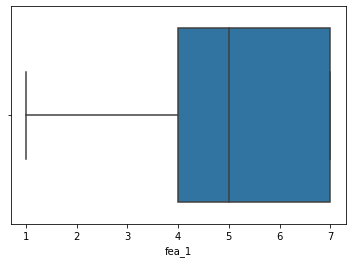

In [ ]:
from seaborn import boxplot
boxplot(df_banco.fea_1, orient="v")

> A priori se observa como la inmensa mayoria de los valores discretos se ubican en 4,5,6 y 7 teniendo muy pocos outliers por debajo de 4.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


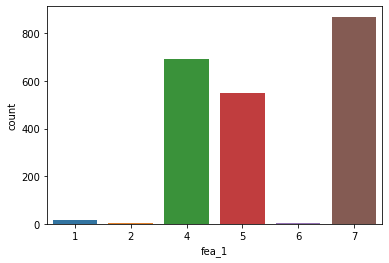

In [ ]:
sns.countplot(df_banco['fea_1'])

En este grafico es posible apreciar de mejor manera lo señalado en el punto anterior y tambien darnos cuenta que el valor discresional "6" es practicamente un outlier. Sumado a que no tenemos valores "3".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


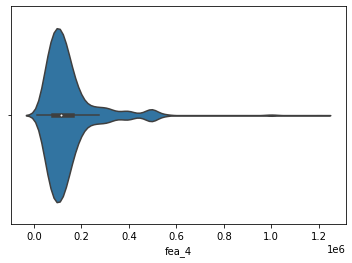

In [ ]:
from seaborn import violinplot
violinplot(df_banco.fea_4, data=df_banco , orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


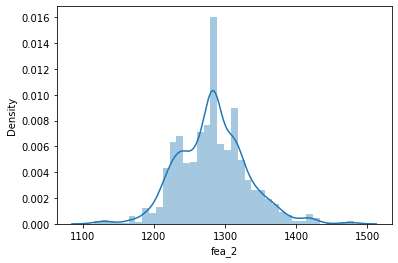

In [ ]:
from seaborn import distplot
distplot(df_banco.fea_2)

# Comienzo del analisis bivariado sobre las variables.

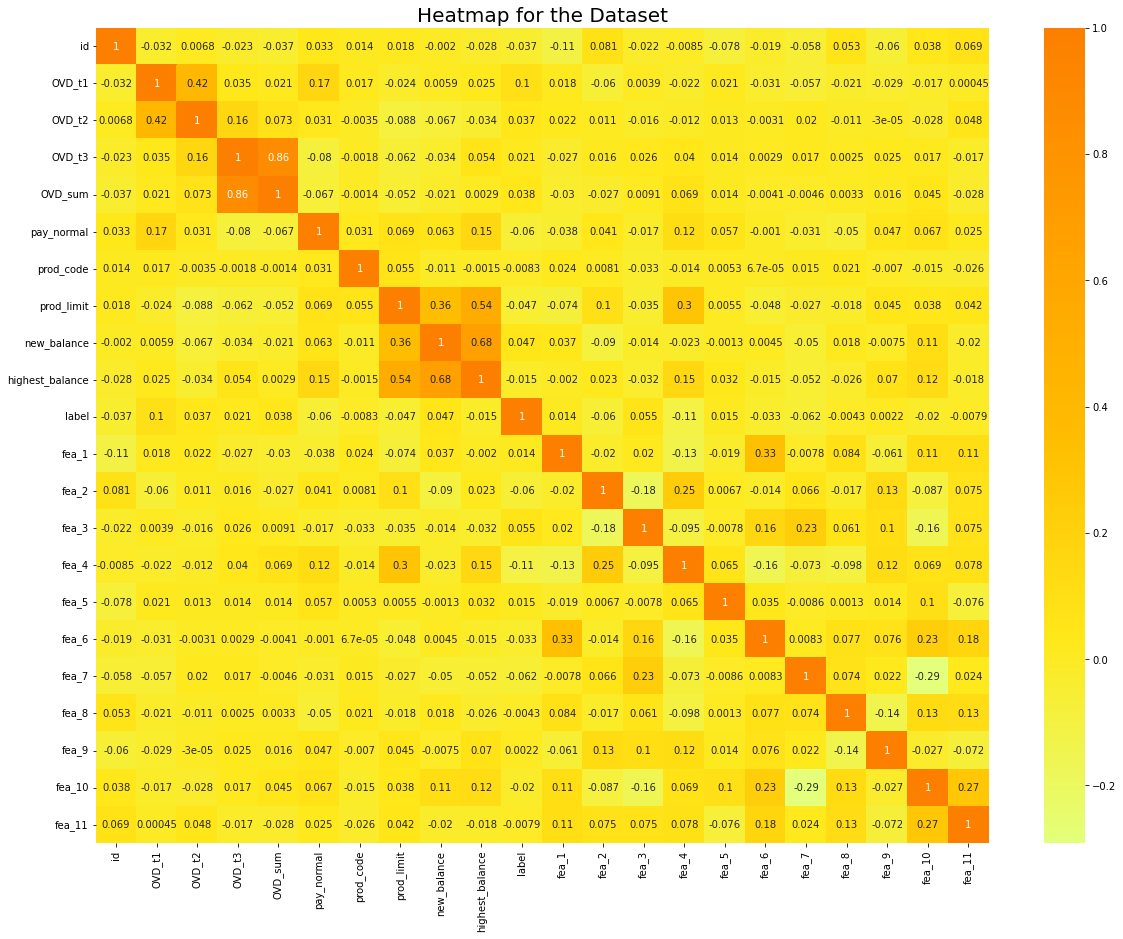

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df_banco.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


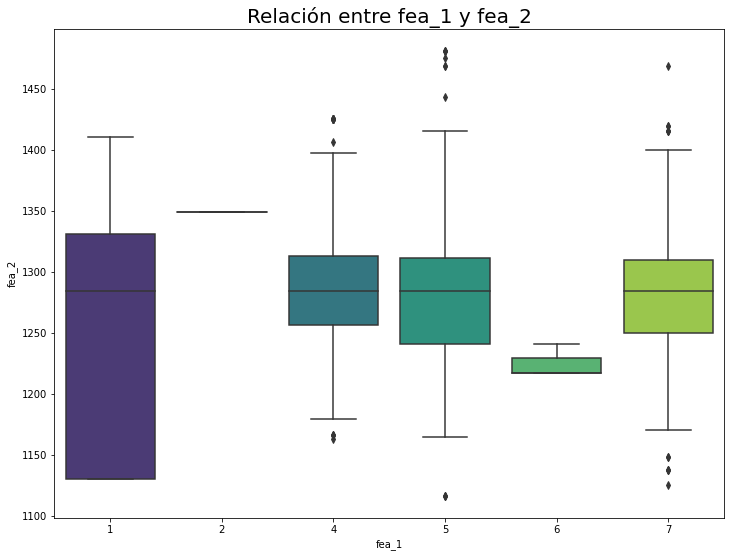

In [ ]:
# fea1 vs id
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_banco['fea_1'], df_banco['fea_2'], palette = 'viridis')
plt.title('Relación entre fea_1 y fea_2', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


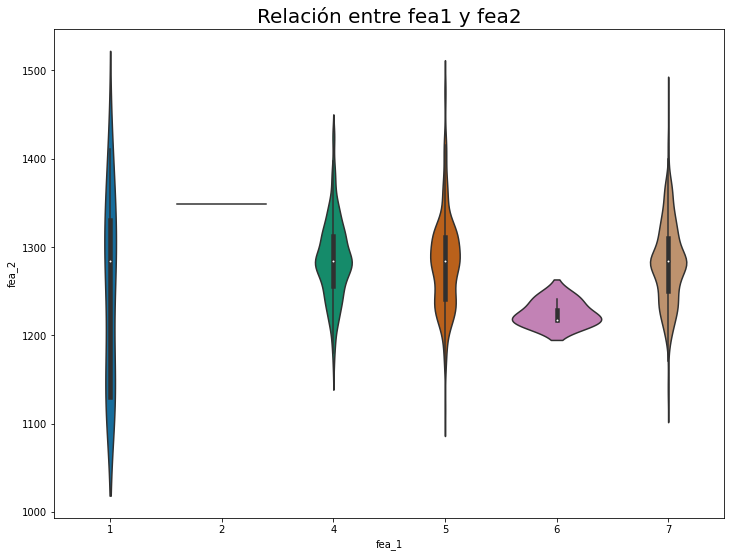

In [ ]:
# fea_2 vs fea_1
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df_banco['fea_1'], df_banco['fea_2'], palette = 'colorblind')
plt.title('Relación entre fea1 y fea2', fontsize = 20, fontweight = 30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


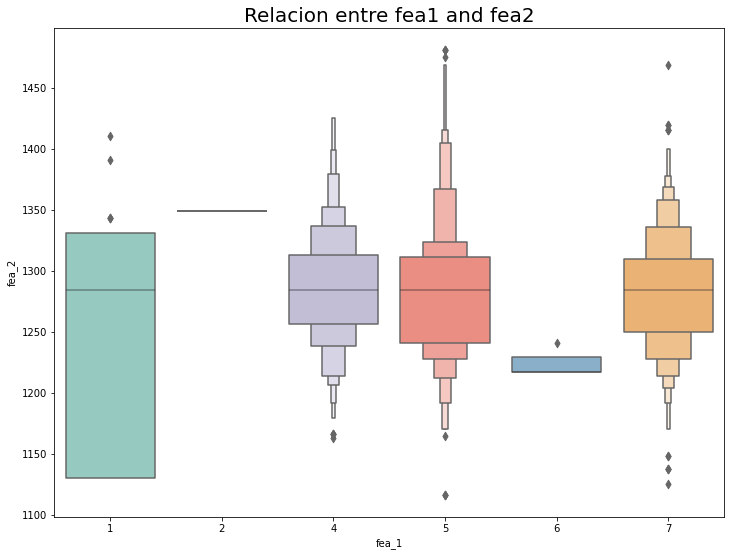

In [ ]:
# Relacion entre fea_1 and fea_3
sns.boxenplot(df_banco['fea_1'], df_banco['fea_2'], palette = 'Set3')
plt.title('Relacion entre fea1 and fea2', fontsize = 20, fontweight = 30)
plt.show()

#https://seaborn.pydata.org/generated/seaborn.boxenplot.html

# Analisis multivariado

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


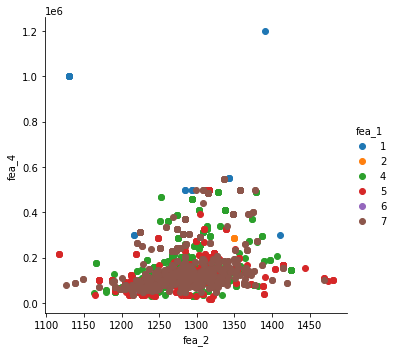

In [ ]:
#FacetGrid - fea_2 vs fea_4 vs fea_1
sns.FacetGrid(df_banco,hue = 'fea_1' , size = 5).map(plt.scatter,'fea_2','fea_4').add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


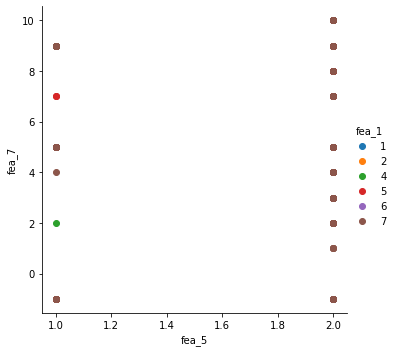

In [ ]:
#FacetGrid -  fea1 vs fea_7 vs fea_5
sns.FacetGrid(df_banco,hue = 'fea_1' , size = 5).map(plt.scatter,'fea_5','fea_7').add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


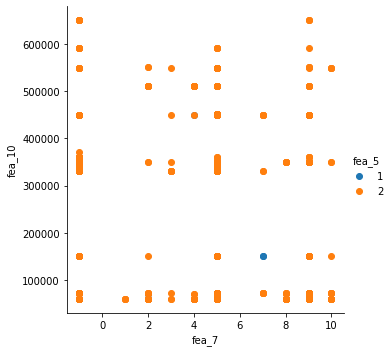

In [ ]:
#FacetGrid - fea_5 vs fea_7 vs fea_10
sns.FacetGrid(df_banco,hue = 'fea_5' , size = 5).map(plt.scatter,'fea_7','fea_10').add_legend();
plt.show()

In [ ]:
#Pairplot
sns.pairplot(df_banco,hue = 'fea_1' , size = 3 , palette = 'Set2')